<h1 style="text-align: center; font-size: 60px;">Assignment 18</h1>
<h3 style="text-align: center; font-size: 20px;">(submitted on 22nd Sept 2025)</h3>

# Outlier detection & removal using Z Score & Standard Deviation

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
# Load the dataset
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
4038,Male,65.348590
6296,Female,59.499077
7334,Female,66.138172
5100,Female,64.038537
8750,Female,62.719087


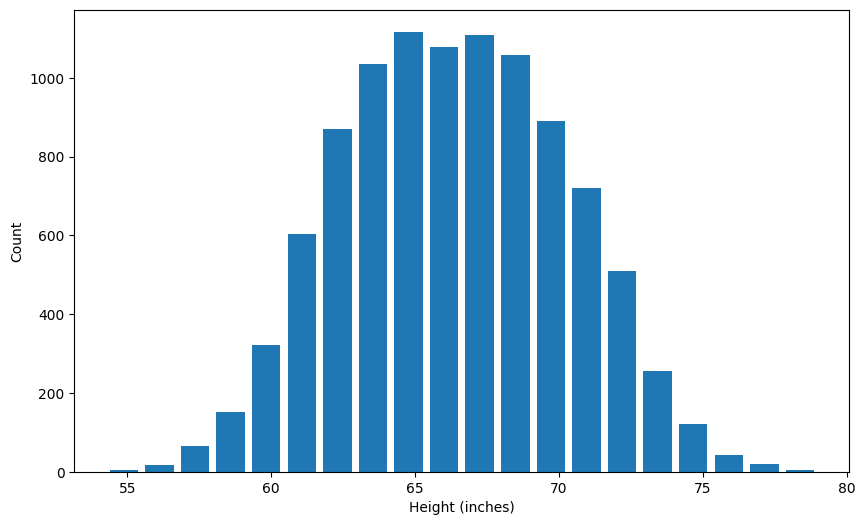

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

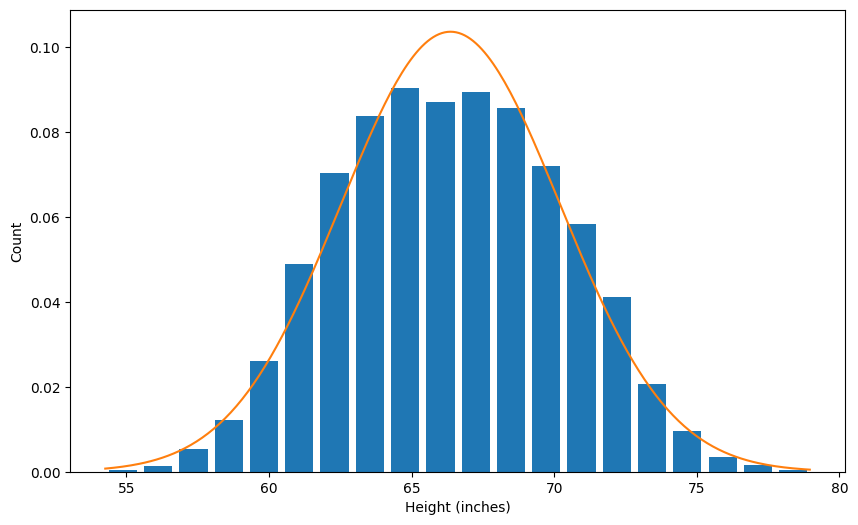

In [5]:
# Plot bell curve along with histogram for our dataset

from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
df.height.mean()

np.float64(66.367559754866)

In [7]:
df.height.std()

np.float64(3.847528120795573)

In [8]:
# Here the mean is 66.37 and standard deviation is 3.84.

### (1) Outlier detection and removal using 3 standard deviation

##### One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [9]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [10]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [11]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


#### Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

##### Now remove these outliers and generate new dataframe

In [12]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [13]:
df_no_outlier_std_dev.shape

(9993, 2)

In [14]:
df.shape

(10000, 2)

In [16]:
# Above shows original dataframe data 10000 data points. 
# Out of that we removed 7 outliers (i.e. 10000-9993)

### (2) Outlier detection and removal using Z Score

In [17]:
# z = (x - mean) / std

In [18]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


#### Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [19]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


### Remove the outliers and produce new dataframe

In [21]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [25]:
df_no_outliers.shape

(9993, 3)

In [23]:
df.shape

(10000, 3)

## EXERCISE

In [26]:
'''
You are given bhp.csv which contains property prices in the city of banglore, India. 
You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower 
    and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). 
    Also plot bell curve on same histogram.

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to 
    step (3) and you will get exact same result
'''

'\nYou are given bhp.csv which contains property prices in the city of banglore, India. \nYou need to examine price_per_sqft column and do following,\n\n(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower \n    and upper bound percentiles\n\n(2) After removing outliers in step 1, you get a new dataframe.\n\n(3) On step(2) dataframe, use 4 standard deviation to remove outliers\n\n(4) Plot histogram for new dataframe that is generated after step (3). \n    Also plot bell curve on same histogram.\n\n(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to \n    step (3) and you will get exact same result\n'

In [27]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

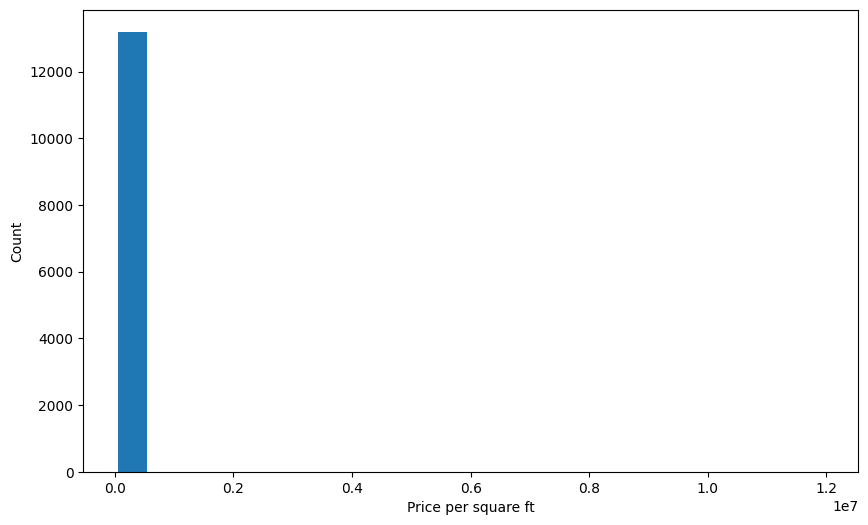

In [29]:
# Plotting Histogram
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

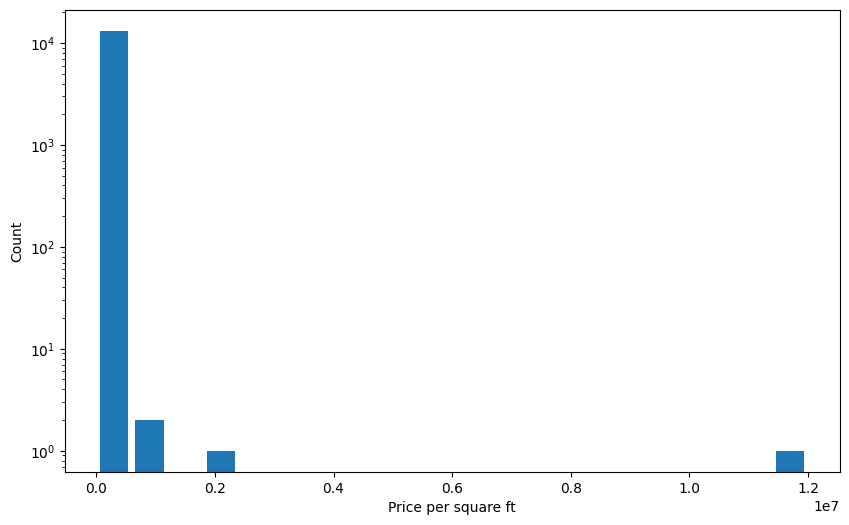

In [30]:
# Using log scale can make visualization little better
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

### (1) Treat outliers using percentile first

In [31]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [32]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
7575,other,1 BHK,425.0,1.0,750.0,1,176470
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [33]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [34]:
df.shape

(13200, 7)

In [35]:
df.shape[0] - df2.shape[0]
# We removed 28 outliers

28

### (2) Remove outliers using 4 standard deviation

In [36]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [39]:
df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3.shape

(13047, 7)

In [40]:
df2.shape[0]-df3.shape[0]

125

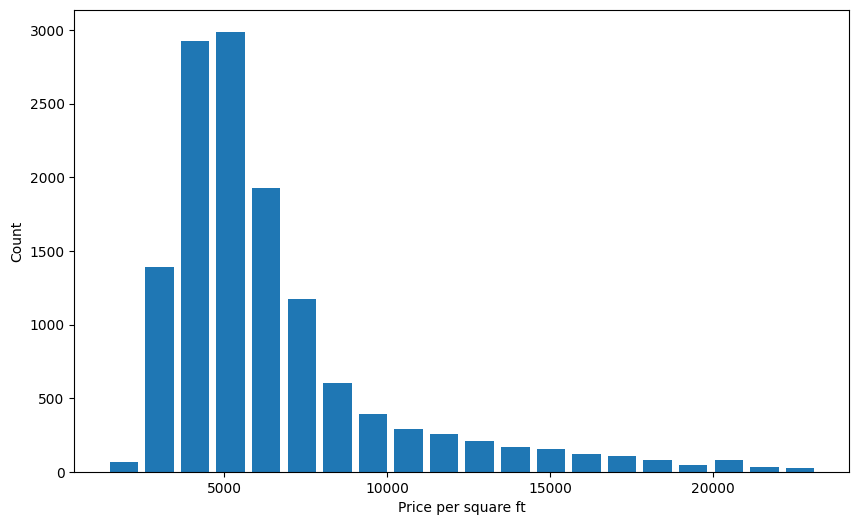

In [41]:
# Plotting histogram of updated dataset
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

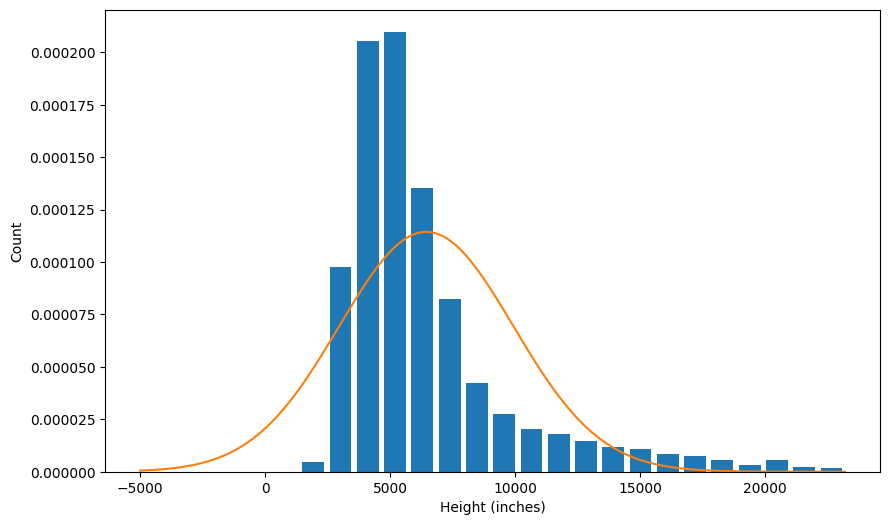

In [42]:
# Adding bell curve
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### (3) Remove outliers using z score. Using z score of 4 as threshold.

In [44]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Pranav S P\AppData\Local\Temp\ipykernel_9464\835203842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
280,Electronics City Phase 1,3 BHK,1490.0,3.0,78.80,3,5288,-0.332202
5667,Thanisandra,3 BHK,1430.0,2.0,54.50,3,3811,-0.688877
571,other,2 Bedroom,1200.0,2.0,65.00,2,5416,-0.301291
10503,Yeshwanthpur,1 BHK,674.0,1.0,36.85,1,5467,-0.288976
6814,Marathahalli,3 BHK,1690.0,3.0,116.00,3,6863,0.048139
7852,Banashankari Stage V,3 BHK,1630.0,3.0,51.35,3,3150,-0.848499
11672,Yeshwanthpur,3 BHK,1692.0,3.0,108.00,3,6382,-0.068016
901,Jigani,2 BHK,918.0,2.0,52.00,2,5664,-0.241403
2649,Doddaballapur,3 Bedroom,3000.0,2.0,120.00,3,4000,-0.643236
12938,Cooke Town,3 BHK,1600.0,3.0,260.00,3,16250,2.314972


In [49]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [50]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3401,Indira Nagar,6 Bedroom,2480.0,4.0,750.0,6,30241,5.693607
9786,2nd Stage Nagarbhavi,5 Bedroom,1200.0,5.0,290.0,5,24166,4.226578
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619,9.890157
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250,5.937267
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961,4.660046


In [51]:
df4 = df2[(df2.zscore > -4)&(df2.zscore < 4)]
df4.shape

(13047, 8)

In [52]:
df2.shape[0] - df4.shape[0]

125

In [53]:
# In this step also we removed 125 outliers. 
# The result is exactly the same as 4 standard deviation.

# END OF ASSIGNMENT 18